# Final Project

In [1]:
import pandas as pd

* `ID`: Client number;
* `CODE_GENDER`: Gender;
* `FLAG_OWN_CAR`: Is there a car;
* `FLAG_OWN_REALTY`: Is there a property;
* `CNT_CHILDREN`: Number of children;
* `AMT_INCOME_TOTAL`: Annual income;
* `NAME_INCOME_TYPE`: Income category (Working, Commercial associate, Pensioner, State servant, Student);
* `NAME_EDUCATION_TYPE`: Education level (Secondary/secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree);
* `NAME_FAMILY_STATUS`: Marital status (Married, Single/not married, Civil marriage, Separated, Widow);
* `NAME_HOUSING_TYPE`: Way of living (House/apartment, With parents, Municipal apartment, Rented apartment, Office apartment, Co-op apartment);
* `DAYS_BIRTH`: Birthday. Count backwards from current day(0), -1 means yesterday;
* `DAYS_EMPLOYED`: Start date of employment. Count backwards from current day(0). If positive, it means the person is currently unemployed;
* `FLAG_MOBIL`: Is there a mobile phone;
* `FLAG_WORK_PHONE`: Is there a work phone;
* `FLAG_PHONE`: Is there a phone;
* `FLAG_EMAIL`: Is there an email;
* `OCCUPATION_TYPE`: Occupation;
* `CNT_FAM_MEMBERS`: Family size.

* `ID`: Client number;
* `MONTHS_BALANCE`: The month of the extracted data is the starting point, backwards: 0 is the current month, -1 is the previous month, and so on;
* `STATUS`: 
    * 0: 1-29 days past due;
    * 1: 30-59 days past due;
    * 2: 60-89 days overdue;
    * 3: 90-119 days overdue;
    * 4: 120-149 days overdue;
    * 5: overdue or bad debts, write-offs for more than 150 days;
    * C: paid off that month;
    * X: no loan for the month.

In [2]:
application_df = pd.read_csv("application_record.csv")
application_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
application_df[[col for col in application_df.columns if "FLAG" in col]]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
0,Y,Y,1,1,0,0
1,Y,Y,1,1,0,0
2,Y,Y,1,0,0,0
3,N,Y,1,0,1,1
4,N,Y,1,0,1,1
...,...,...,...,...,...,...
438552,N,Y,1,0,0,0
438553,N,N,1,0,0,0
438554,N,N,1,1,0,0
438555,N,Y,1,0,0,0


In [4]:
application_df["FLAG_OWN_CAR"].value_counts(), application_df["FLAG_OWN_REALTY"].value_counts()

(N    275459
 Y    163098
 Name: FLAG_OWN_CAR, dtype: int64,
 Y    304074
 N    134483
 Name: FLAG_OWN_REALTY, dtype: int64)

In [5]:
to_encode_flag_columns = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]
application_df[to_encode_flag_columns] = \
    application_df[to_encode_flag_columns].replace({'Y': 1, 'N': 0})

In [6]:
application_df["FLAG_OWN_CAR"].value_counts(), application_df["FLAG_OWN_REALTY"].value_counts()

(0    275459
 1    163098
 Name: FLAG_OWN_CAR, dtype: int64,
 1    304074
 0    134483
 Name: FLAG_OWN_REALTY, dtype: int64)

In [7]:
application_df["CODE_GENDER"].value_counts()

F    294440
M    144117
Name: CODE_GENDER, dtype: int64

In [8]:
application_df["CODE_GENDER"] = \
    application_df["CODE_GENDER"].apply(lambda x: 1 if x=="M" else 0)

In [9]:
application_df["CODE_GENDER"].value_counts()

0    294440
1    144117
Name: CODE_GENDER, dtype: int64

In [10]:
columns_with_missing = application_df.columns[application_df.isna().any()]
application_df[columns_with_missing]

,OCCUPATION_TYPE
0,NaN
1,NaN
2,Security staff
3,Sales staff
4,Sales staff
...,...
438552,NaN
438553,Laborers
438554,Sales staff
438555,NaN


In [11]:
application_df[columns_with_missing].isna().sum()

OCCUPATION_TYPE    134203
dtype: int64

In [12]:
count_id = application_df['ID'].value_counts()
id_with_multiple_rows = count_id[count_id > 1].index
filtered_df = application_df[application_df['ID'].isin(id_with_multiple_rows)]
filtered_df.sort_values(by='ID')
filtered_df["ID"].value_counts()

7702516    2
7618285    2
7603224    2
7023108    2
7089090    2
7702238    2
7243768    2
7045885    2
7836711    2
7743418    2
7045794    2
7207977    2
7742298    2
7154598    2
7154819    2
7024111    2
7282535    2
7050948    2
7416167    2
7174719    2
7833087    2
7135270    2
7022197    2
7036518    2
7602432    2
7090931    2
7836971    2
7213374    2
7052783    2
7023651    2
7838075    2
7636389    2
7052812    2
7372589    2
7155150    2
7091721    2
7046068    2
7137299    2
7744386    2
7772847    2
7636756    2
7317997    2
7053557    2
7742853    2
7576316    2
7099881    2
7022327    2
Name: ID, dtype: int64

In [13]:
filtered_df["ID"].nunique()

47

In [14]:
filtered_df.sort_values(by='ID')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,1,1,1,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,0,0,1,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431545,7022327,0,0,1,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,1,1,1,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,1,1,1,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,0,0,1,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
421464,7836971,1,1,0,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
428620,7836971,0,0,1,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
422068,7838075,1,0,1,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


However, these IDs are not present in the `credit_df` dataset, therefore they won't be a problem for our analysis:

In [15]:
credit_df = pd.read_csv("credit_record.csv")
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [16]:
len(set(credit_df['ID']).intersection(set(filtered_df["ID"])))

0

In [17]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [18]:
application_df.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,438557.000000,438557.000000,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.328616,0.371897,0.693351,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.469711,0.483312,0.461103,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,0.000000,1.000000,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,1.000000,1.000000,1.000000,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [19]:
# QUESTI SONO I DISOCCUPATI:
application_df[application_df["DAYS_EMPLOYED"]>0]["DAYS_EMPLOYED"].value_counts()

365243    75329
Name: DAYS_EMPLOYED, dtype: int64

I giorni di occupazioni sono plausibili, il più alto corrisponde a circa 48 anni, va bene.

**FLAG_MOBIL INUTILE**!

In [20]:
application_df["FLAG_MOBIL"].value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [21]:
application_df["FLAG_PHONE"].value_counts()

0    312353
1    126204
Name: FLAG_PHONE, dtype: int64

**UNICI PROBLEMI**:
* MISSING VALUES IN `OCCUPATION_TYPE`;
* DUPLICATED IDs (47 IDs con 2 righe associate) --> li eliminerei.

In [22]:
credit_df["ID"].nunique()

45985

In [23]:
application_df["ID"].nunique()

438510

In [24]:
len(set(application_df['ID']).intersection(set(credit_df['ID'])))

36457

In [25]:
grouped_df = credit_df.groupby('ID')
grouped_df

In [26]:
pivot_tb = credit_df.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,C


For each ID, let us compute the `open_month` and `end_month` variables, indicating the month when the account was opened and the last month for which we have data, respectively:

In [27]:
pivot_tb['open_month'] = grouped_df['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped_df['MONTHS_BALANCE'].max()
pivot_tb

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-7,-6,-5,-4,-3,-2,-1,0,open_month,end_month
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,X,-3,0
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,-18,0
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,-21,0
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,-14,0
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,-59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28,-11
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,-17,0
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,C,-12,0


From the latter two variables, the `window` can be built, providing information on the time period for which we have data:

In [28]:
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb.loc[:, 'window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb.reset_index(drop = True, inplace = True)
pivot_tb

C:\Users\gugli\AppData\Local\Temp\ipykernel_3332\2929976596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_tb.loc[:, 'window'] = pivot_tb['end_month'] - pivot_tb['open_month']


MONTHS_BALANCE,ID,open_month,end_month,window
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [29]:
credit_df = pd.merge(credit_df, pivot_tb, on = 'ID', how = 'left')
credit_df

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18
...,...,...,...,...,...,...
1048570,5150487,-25,C,-29,0,29
1048571,5150487,-26,C,-29,0,29
1048572,5150487,-27,C,-29,0,29
1048573,5150487,-28,C,-29,0,29


In [30]:
credit_df["window"].max()

60

## Observation Window Analysis

To classify a customer as 'good' or 'bad,' it is necessary to determine an appropriate **performance window**.<br> If the observation window is too short, users' behavior may not fully manifest, leading to unnecessary noise in our data. Therefore, only customers with an observation window longer than the performance window will be considered, and the latter will be defined as the period during which the event rate stabilizes, meaning that the event rate does not increase significantly.

In [31]:
def calculate_observe(credit, command):
    '''calculate observe window
    '''
    id_sum = len(set(pivot_tb['ID']))
    credit['status'] = 0
    exec(command)
    credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']
    # minimum value of `month_on_book` such that status==1 for each ID:
    minagg = credit[credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    rates_df = pd.DataFrame({'month_on_book':range(0,61), 'rate': None})
    lst = []
    for i in range(0,61):
        # select the IDs with first time having status=1 in month_on_book==i:
        due = list(minagg[minagg['month_on_book']  == i]['ID'])
        lst.extend(due)
        rates_df.loc[rates_df['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum 
    return rates_df['rate']

command = "credit.loc[(credit['STATUS'] == '1') | (credit['STATUS'] == '2') | " \
    "(credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_observe(credit_df, command)
command = "credit.loc[(credit['STATUS'] == '2') | (credit['STATUS'] == '3' ) | " \
    " (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_observe(credit_df, command)
command = "credit.loc[(credit['STATUS'] == '3' )| (credit['STATUS'] == '4' ) | " \
    " (credit['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_observe(credit_df, command)
command = "credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_observe(credit_df, command)
command = "credit.loc[(credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(credit_df, command)

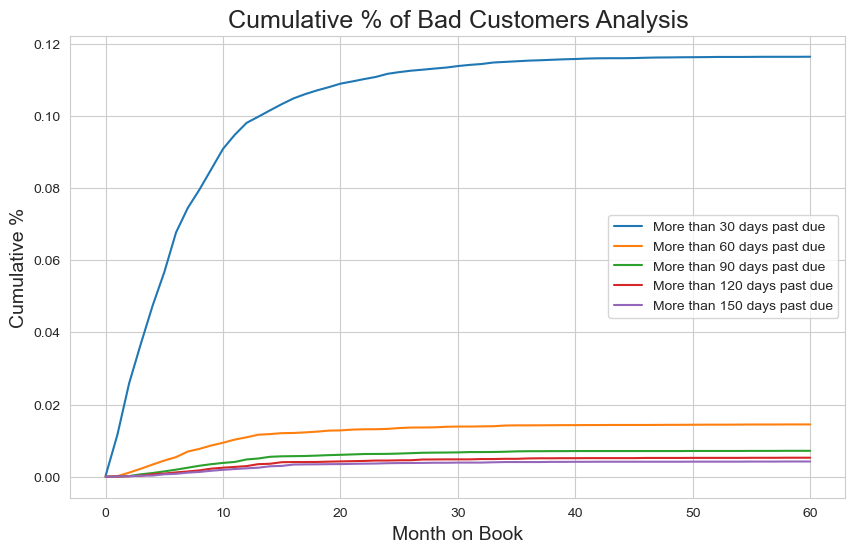

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [
    'More than 30 days past due',
    'More than 60 days past due',
    'More than 90 days past due',
    'More than 120 days past due',
    'More than 150 days past due'
]
data = [morethan30, morethan60, morethan90, morethan120, morethan150]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot(data[i], label=labels[i])
plt.title('Cumulative % of Bad Customers Analysis', fontsize=18)
plt.xlabel('Month on Book', fontsize=14)
plt.ylabel('Cumulative %', fontsize=14)
plt.legend()
plt.show()

In [33]:
def get_performance_window(rates, ratio=0.85):
    max_value = max(rates)
    threshold = ratio * max_value
    # search the index of the value greater than or equal to the threshold:
    performance_window = next((i for i, rate in enumerate(rates) if rate >= threshold), None)
    return performance_window

In [34]:
performance_window = get_performance_window(morethan90)

Therefore, using "more than 90 days past due" as status to identify a bad customer, the performance window is set to 21, and all the customers with an observation window shorter than the performance window are excluded from the analysis:

In [37]:
import numpy as np

credit_df = credit_df[credit_df['window'] >= performance_window]
# analyze > 90 days past due 
credit_df['status'] = np.where((credit_df['STATUS'] == '3' ) | (credit_df['STATUS'] == '4' ) | (credit_df['STATUS'] == '5'), 1, 0) 
# 0: < 90 days past due, 1: > 90 days past due 
credit_df['status'] = credit_df['status'].astype(np.int8)
# Calculate month on book: how many months after opening account
credit_df['month_on_book'] = credit_df['MONTHS_BALANCE'] - credit_df['open_month'] 
credit_df.sort_values(by = ['ID','month_on_book'], inplace = True)
credit_df

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
44,5001713,-21,X,-21,0,21,0,0
43,5001713,-20,X,-21,0,21,0,1
42,5001713,-19,X,-21,0,21,0,2
41,5001713,-18,X,-21,0,21,0,3
40,5001713,-17,X,-21,0,21,0,4
...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25
1048548,5150487,-3,C,-29,0,29,0,26
1048547,5150487,-2,C,-29,0,29,0,27
1048546,5150487,-1,C,-29,0,29,0,28


In [47]:
bad_customer_ids = credit_df[credit_df['status'] == 1]['ID'].unique()
credit_df[credit_df['ID'].isin(bad_customer_ids)]

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
8920,5002126,-55,0,-55,0,55,0,0
8919,5002126,-54,0,-55,0,55,0,1
8918,5002126,-53,X,-55,0,55,0,2
8917,5002126,-52,X,-55,0,55,0,3
8916,5002126,-51,1,-55,0,55,0,4
...,...,...,...,...,...,...,...,...
1041028,5149838,-4,C,-32,0,32,0,28
1041027,5149838,-3,C,-32,0,32,0,29
1041026,5149838,-2,C,-32,0,32,0,30
1041025,5149838,-1,C,-32,0,32,0,31


In [51]:
len(bad_customer_ids)

(247, 20924)

In [58]:
bad_customer_df = pd.DataFrame({'ID': credit_df['ID'].unique()})
bad_customer_df['bad_customer'] = bad_customer_df['ID'].isin(bad_customer_ids).astype(int)
bad_customer_df

,ID,bad_customer
0,5001713,0
1,5001715,0
2,5001717,0
3,5001718,0
4,5001719,0
...,...,...
20919,5150475,0
20920,5150476,0
20921,5150480,0
20922,5150481,0


In [60]:
len(set(application_df['ID']).intersection(set(bad_customer_df["ID"])))

15166

In [61]:
final_df = pd.merge(bad_customer_df, application_df, on = 'ID', how = 'inner')
final_df

,ID,bad_customer,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,0,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
1,5008810,0,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
2,5008811,0,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
3,5008825,0,0,1,0,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0
4,5008826,0,0,1,0,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,5150475,0,1,1,1,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0
15162,5150476,0,1,1,1,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0
15163,5150480,0,0,1,1,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
15164,5150481,0,0,1,1,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


In [62]:
final_df["bad_customer"].nunique()

2

In [76]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

np.random.seed(0)
n_samples = 1000
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(1, 1, n_samples)
p = 0.2
Y = np.random.binomial(1, p, n_samples)
data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
X = data.drop("Y", axis=1).values
y = data["Y"].values
ros = RandomOverSampler(sampling_strategy=0.1)
X_res, y_res = ros.fit_resample(X, y)

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.